## Import

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 파일명 의미

1. Patient number (101,102,...,226)

2. Recording index

3. Chest location

      a. Trachea (Tc)

      b. Anterior left (Al)

      c. Anterior right (Ar)

      d. Posterior left (Pl)

      e. Posterior right (Pr)

      f. Lateral left (Ll)

      g. Lateral right (Lr)

4.    Acquisition mode

     a. sequential/single channel (sc),

     b. simultaneous/multichannel (mc)

5.    Recording equipment

     a. AKG C417L Microphone (AKGC417L),

     b. 3M Littmann Classic II SE Stethoscope (LittC2SE),

     c. 3M Litmmann 3200 Electronic Stethoscope (Litt3200),

     d.  WelchAllyn Meditron Master Elite Electronic Stethoscope (Meditron)

## Raw Audio Data

In [22]:
# 파일 경로
text_file_path = '/content/drive/MyDrive/AIFFEL_THON/ICBHI_final_database/178_1b2_Lr_mc_AKGC417L.txt'

# 텍스트 파일 읽기
df = pd.read_csv(text_file_path, sep='\t', header=None)
df.columns = ['Beginning of respiratory', 'End of respiratory', 'crackles', 'wheezes']

print(df)

    Beginning of respiratory  End of respiratory  crackles  wheezes
0                      0.042               1.280         0        1
1                      1.280               2.697         1        1
2                      2.697               4.006         1        1
3                      4.006               5.506         0        1
4                      5.506               7.089         0        1
5                      7.089               8.863         0        0
6                      8.863              10.268         1        0
7                     10.268              11.982         1        1
8                     11.982              13.732         1        0
9                     13.732              15.589         1        0
10                    15.589              17.387         1        0
11                    17.387              19.494         1        0


In [23]:
data_list = df.to_dict('records')
print(data_list)

[{'Beginning of respiratory': 0.042, 'End of respiratory': 1.28, 'crackles': 0, 'wheezes': 1}, {'Beginning of respiratory': 1.28, 'End of respiratory': 2.697, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 2.697, 'End of respiratory': 4.006, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 4.006, 'End of respiratory': 5.506, 'crackles': 0, 'wheezes': 1}, {'Beginning of respiratory': 5.506, 'End of respiratory': 7.089, 'crackles': 0, 'wheezes': 1}, {'Beginning of respiratory': 7.089, 'End of respiratory': 8.863, 'crackles': 0, 'wheezes': 0}, {'Beginning of respiratory': 8.863, 'End of respiratory': 10.268, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 10.268, 'End of respiratory': 11.982, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 11.982, 'End of respiratory': 13.732, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 13.732, 'End of respiratory': 15.589, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 15.589, 'End of

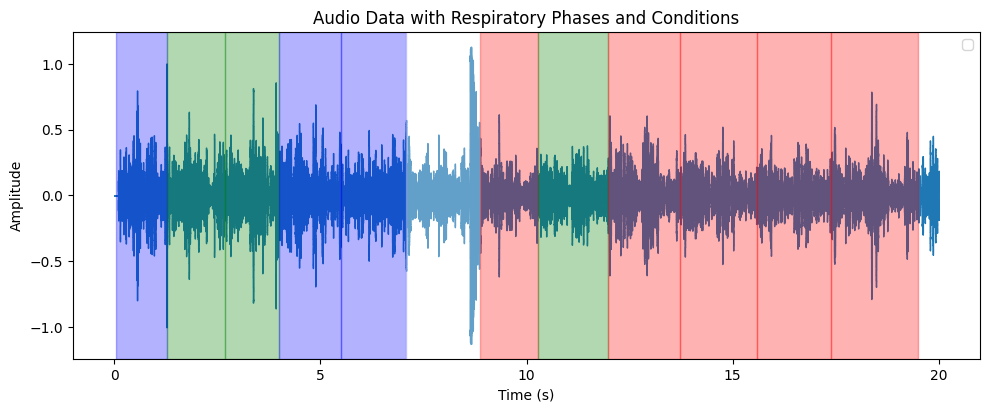

In [27]:
# 오디오 파일 로딩
wav_file_path = '/content/drive/MyDrive/AIFFEL_THON/ICBHI_final_database/178_1b2_Lr_mc_AKGC417L.wav'  # 오디오 파일 경로
y, sr = librosa.load(wav_file_path, sr=4000)  # y는 오디오 신호, sr은 샘플링 레이트

# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]
    end = entry["End of respiratory"]
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    # 사각형 영역 표시
    plt.axvspan(start, end, color=color, alpha=0.3)

plt.legend()
plt.title('Audio Data with Respiratory Phases and Conditions')
plt.show()

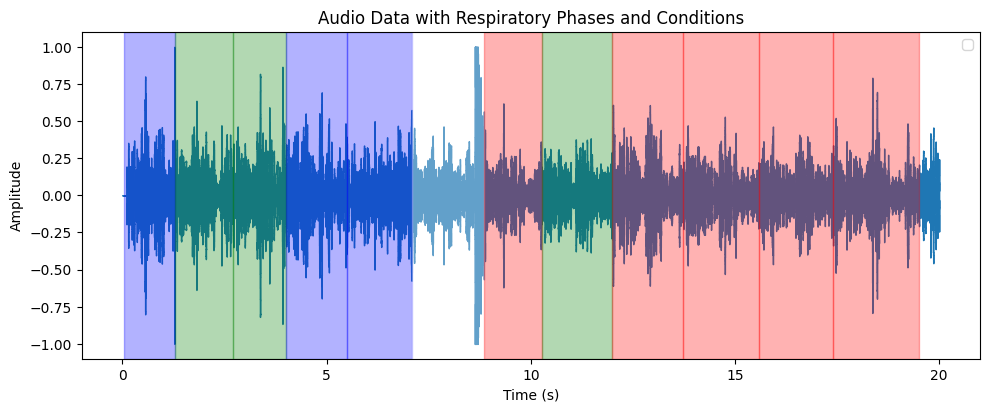

In [28]:
y2, sr2 = librosa.load(wav_file_path, sr=None)  # y는 오디오 신호, sr은 샘플링 레이트

# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y2, sr=sr2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]
    end = entry["End of respiratory"]
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    # 사각형 영역 표시
    plt.axvspan(start, end, color=color, alpha=0.3)

plt.legend()
plt.title('Audio Data with Respiratory Phases and Conditions')
plt.show()

Make Frames

Mel-Spectogram

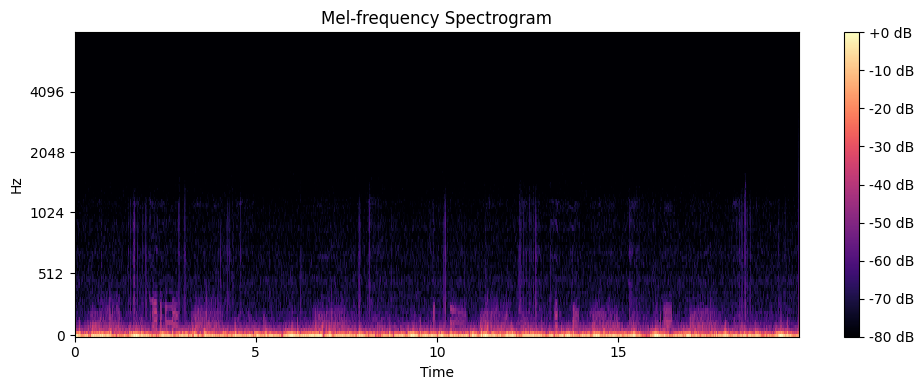

In [26]:
# 오디오 파일 로딩
y, sr = librosa.load(file_path, sr=None)  # y는 오디오 신호, sr은 샘플링 레이트

# Mel 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='constant', power=2.0)

# 로그 스케일로 변환
S_dB = librosa.power_to_db(S, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency Spectrogram')
plt.tight_layout()
plt.show()

Augmentation